In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from scipy.spatial import distance
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
import seaborn as sns

df - климатические и почвенные параметры для каждого экземляра
Q - set of the ancestry fractions

In [2]:
## read all climate-soil parameters 
all_data = pd.read_csv("full_dataframes/result_k_20_climate_soil.csv")

q_names = ["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20"]
Q = all_data[q_names]
features =  ['bio1', 'bio2', 'bio3',
       'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9', 'bio10', 'bio11',
       'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17', 'bio18', 'bio19',
       'solar_min', 'solar_max', 'solar_mean', 'wind_min', 'wind_max',
       'wind_mean', 'vapr_min', 'vapr_max', 'vapr_mean', 'T_GRAVEL', 'T_SAND',
       'T_SILT', 'T_CLAY', 'T_REF_BULK_DENSITY', 'T_OC', 'T_PH_H2O',
       'T_CEC_CLAY', 'T_CEC_SOIL', 'T_BS', 'T_TEB', 'T_CACO3', 'T_CASO4',
       'T_ESP', 'T_ECE', 'S_GRAVEL', 'S_SAND', 'S_SILT', 'S_CLAY',
       'S_REF_BULK_DENSITY', 'S_OC', 'S_PH_H2O', 'S_CEC_CLAY', 'S_CEC_SOIL',
       'S_BS', 'S_TEB', 'S_CACO3', 'S_CASO4', 'S_ESP', 'S_ECE']

df = all_data[features]

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

Попробуем самую простое назначение класса векторам из Q: если максимальный элемент вектора  > 0.8, то в качества класса данного вектора берем индекс максимального элемента, иначе назначаем класс 0.

In [4]:
def make_label(v):
    tmp = np.argmax(v)
    return tmp + 1 if v[tmp] > 0.80 else 0

label_simple = np.apply_along_axis(make_label, 1, Q)

PCA и t-SNE

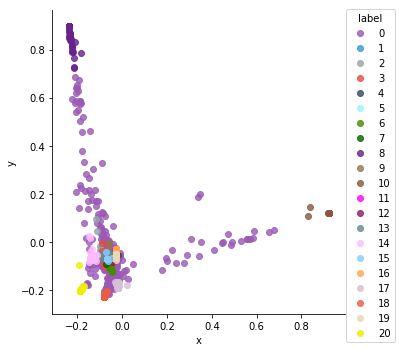

In [5]:
pca_res = pca.fit_transform(Q)
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", 
          "#98f5ff", "#458b00", "#006400", "#68228b", "#8b7a50", "#8b5742",
         "#ff00ff","#8b1c62", "#668b8b","#ffbbff","#87ceff", "#ffa54f","#d8bfd8","#ee5c42","#eed8ae","#eeee00"]

df_pca = pd.DataFrame({'x': pca_res[:,0], 'y': pca_res[:,1],'label': label_simple})
facet = sns.lmplot(data=df_pca, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True,  palette=sns.color_palette(flatui))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1048 samples in 0.002s...
[t-SNE] Computed neighbors for 1048 samples in 0.067s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1048
[t-SNE] Computed conditional probabilities for sample 1048 / 1048
[t-SNE] Mean sigma: 0.000008
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.992615
[t-SNE] Error after 300 iterations: 0.326239


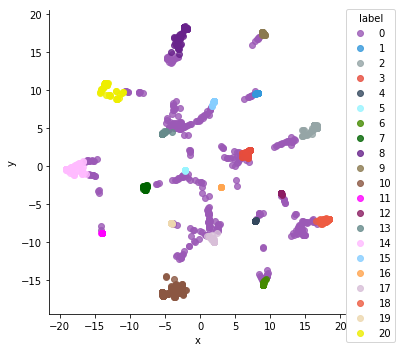

In [6]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(Q)
df_tsne =  pd.DataFrame({'x': tsne_results[:,0], 'y': tsne_results[:,1] ,'label': label_simple})
facet = sns.lmplot(data=df_tsne, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True,  palette=sns.color_palette(flatui))

In [7]:
from sklearn.model_selection import train_test_split

X_train_s, X_test_val, y_train_s, y_test_val = train_test_split(df, label_simple, test_size=0.3, random_state=123456)
X_test_s, X_val_s, y_test_s, y_val_s = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=123456)

попробуем классифицировать с помощью Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
rf_clf = RandomForestClassifier(n_jobs=2, random_state=0)
rf_clf.fit(X_train_s, y_train_s)
y_pred_rf = rf_clf.predict(X_test_s)

accuracy = accuracy_score(y_test_s, y_pred_rf)
print("accuracy",accuracy)
print("r2", metrics.r2_score(y_test_s, y_pred_rf))
print("mean_squared_error", metrics.mean_squared_error(y_test_s, y_pred_rf))
print(metrics.classification_report(y_pred_rf, y_test_s))


accuracy 0.738853503185
r2 0.183060575938
mean_squared_error 34.5414012739
             precision    recall  f1-score   support

          0       0.66      0.68      0.67        56
          1       1.00      0.67      0.80         3
          2       0.91      0.91      0.91        11
          3       0.22      0.50      0.31         4
          4       0.00      0.00      0.00         1
          5       1.00      0.50      0.67         2
          6       0.75      1.00      0.86         3
          7       1.00      0.89      0.94         9
          8       0.89      0.89      0.89         9
          9       1.00      0.83      0.91         6
         10       0.85      0.79      0.81        14
         11       1.00      0.50      0.67         2
         12       0.67      1.00      0.80         4
         13       1.00      0.60      0.75         5
         14       0.83      1.00      0.91         5
         15       1.00      0.25      0.40         4
         16       0.00 

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


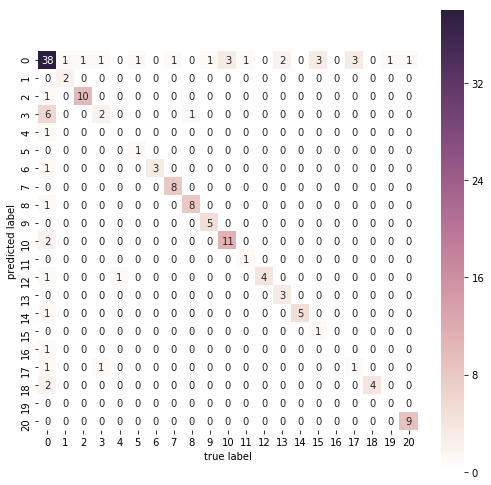

In [9]:
mat_rf = confusion_matrix(y_test_s, y_pred_rf)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, sub = plt.subplots(1, 1)
fig.set_size_inches(8.5, 8.5)
sns.heatmap(mat_rf, square=True, cmap=cmap, annot=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

Потом пригодится, чтобы отсеить неважные параметры.

In [10]:
rf_clf_10 = RandomForestClassifier(n_jobs=2, random_state=0, max_depth=10)
rf_clf_10.fit(X_train_s, y_train_s)
print(sorted(zip(map(lambda x: round(x, 4), rf_clf_10.feature_importances_), features), 
             reverse=True))

[(0.042900000000000001, 'vapr_min'), (0.041599999999999998, 'solar_min'), (0.041500000000000002, 'bio4'), (0.038600000000000002, 'bio6'), (0.038399999999999997, 'solar_mean'), (0.036600000000000001, 'wind_min'), (0.034799999999999998, 'vapr_mean'), (0.034299999999999997, 'solar_max'), (0.033000000000000002, 'bio19'), (0.031899999999999998, 'bio18'), (0.031300000000000001, 'bio10'), (0.029700000000000001, 'vapr_max'), (0.028299999999999999, 'wind_mean'), (0.027300000000000001, 'bio9'), (0.0263, 'wind_max'), (0.024799999999999999, 'bio8'), (0.024400000000000002, 'T_GRAVEL'), (0.024199999999999999, 'bio11'), (0.023300000000000001, 'bio17'), (0.021999999999999999, 'bio12'), (0.0212, 'bio5'), (0.021100000000000001, 'S_GRAVEL'), (0.019, 'T_BS'), (0.0183, 'bio16'), (0.017500000000000002, 'bio15'), (0.0172, 'bio2'), (0.0166, 'T_PH_H2O'), (0.0135, 'S_BS'), (0.0134, 'S_TEB'), (0.012800000000000001, 'bio1'), (0.012500000000000001, 'S_OC'), (0.012200000000000001, 'S_SAND'), (0.0121, 'bio13'), (0.0

Попробуем изменить способ назначать классы для векторов из Q: наивный метод + knn для 0 класса

In [11]:
from sklearn.neighbors import KNeighborsClassifier
not_class_data  = Q.loc[label_simple == 0]
class_data = Q.loc[label_simple != 0]
class_label = label_simple[label_simple != 0]
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(class_data,class_label )
label_knn = np.arange(label_simple.shape[0])
label_knn[label_simple != 0] = label_simple[label_simple != 0]
label_knn[label_simple == 0] = neigh.predict(not_class_data)

посмотрим как новыее классы выглядят на PCA и t-SNE

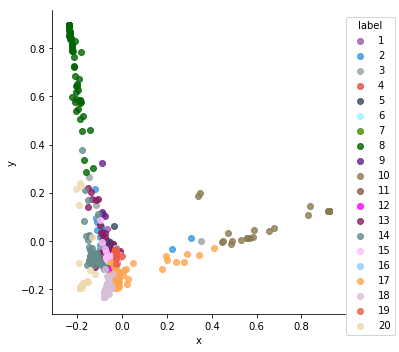

In [12]:
pca_res = pca.fit_transform(Q)
df_pca = pd.DataFrame({'x': pca_res[:,0], 'y': pca_res[:,1],'label': label_knn})
facet = sns.lmplot(data=df_pca, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True,  palette=sns.color_palette(flatui))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1048 samples in 0.003s...
[t-SNE] Computed neighbors for 1048 samples in 0.067s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1048
[t-SNE] Computed conditional probabilities for sample 1048 / 1048
[t-SNE] Mean sigma: 0.000008
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.289707
[t-SNE] Error after 300 iterations: 0.392022


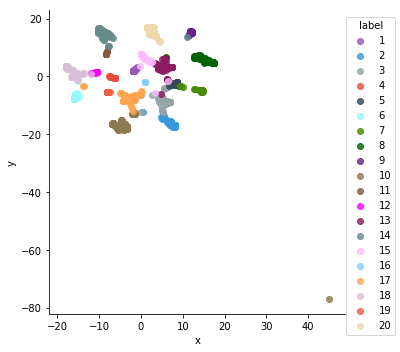

In [13]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(Q)
df_tsne = pd.DataFrame({'x': tsne_results[:,0], 'y': tsne_results[:,1] ,'label': label_knn})
facet = sns.lmplot(data=df_tsne, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True,  palette=sns.color_palette(flatui))

теперь попробуем на этом наш классификатор random forest

In [14]:
X_train_k, X_test_val, y_train_k, y_test_val = train_test_split(df, label_knn, test_size=0.3, random_state=123456)
X_test_k, X_val_k, y_test_k, y_val_k = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=123456)

In [15]:
rf_clf_knn = RandomForestClassifier(n_jobs=2, random_state=34)
rf_clf_knn.fit(X_train_k, y_train_k)
y_pred_knn = rf_clf_knn.predict(X_test_k)

accuracy = accuracy_score(y_test_k, y_pred_knn)
print("accuracy",accuracy)
print("r2", metrics.r2_score(y_test_k, y_pred_knn))
print(metrics.classification_report(y_test_k, y_pred_knn))

accuracy 0.802547770701
r2 0.3406389778
             precision    recall  f1-score   support

          1       0.75      1.00      0.86         3
          2       1.00      0.85      0.92        13
          3       0.67      0.73      0.70        11
          4       0.20      0.50      0.29         2
          5       0.60      0.60      0.60         5
          6       0.75      0.75      0.75         4
          7       0.91      1.00      0.95        10
          8       0.91      0.77      0.83        13
          9       0.83      1.00      0.91         5
         10       0.83      1.00      0.91        15
         11       1.00      0.50      0.67         2
         12       1.00      0.71      0.83         7
         13       1.00      0.93      0.96        14
         14       0.80      0.73      0.76        11
         15       0.75      0.75      0.75         4
         16       0.00      0.00      0.00         1
         17       0.60      0.43      0.50        14
     

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


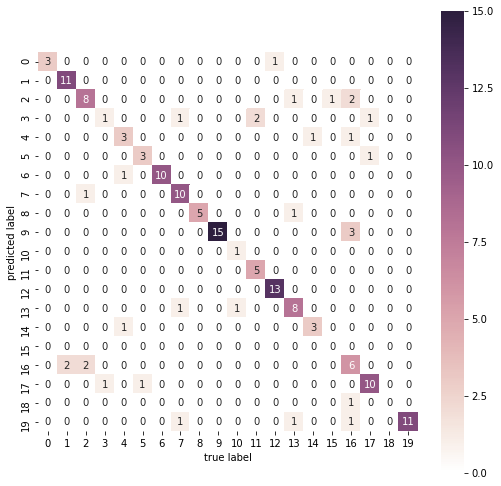

In [16]:
mat_rf_knn = confusion_matrix(y_test_k, y_pred_knn)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, sub = plt.subplots(1, 1)
fig.set_size_inches(8.5, 8.5)
sns.heatmap(mat_rf_knn.T, square=True, cmap=cmap, annot=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

попробуем класстеризовать вектора из Q, на tsne можно заметить, что там меньше чем 20 кластеров

попробуем kmeans

In [17]:
from sklearn.cluster import KMeans
label_kmean = KMeans(n_clusters=12, random_state=2).fit_predict(Q)

In [18]:
label_kmean

array([6, 6, 7, ..., 5, 5, 5], dtype=int32)

In [19]:
# from sklearn.cluster import AffinityPropagation
# af = AffinityPropagation(preference=-19).fit(Q)
# cluster_centers_indices = af.cluster_centers_indices_
# labels_af = af.labels_

# n_clusters_ = len(cluster_centers_indices)
# print(np.unique(af.labels_))
# print(n_clusters_)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1048 samples in 0.003s...
[t-SNE] Computed neighbors for 1048 samples in 0.065s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1048
[t-SNE] Computed conditional probabilities for sample 1048 / 1048
[t-SNE] Mean sigma: 0.000008
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.439217
[t-SNE] Error after 300 iterations: 0.329030


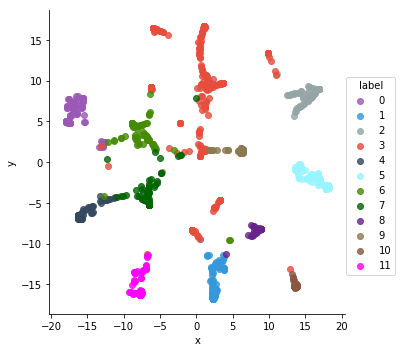

In [20]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(Q)
df_tsne = pd.DataFrame({'x': tsne_results[:,0], 'y': tsne_results[:,1] ,'label': label_kmean})
facet = sns.lmplot(data=df_tsne, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True,  palette=sns.color_palette(flatui))

In [21]:
X_train_k12, X_val, y_train_k12, y_val = train_test_split(df, label_kmean, test_size=0.3, random_state=123456)
X_train_k12, X_test_k12, y_train_k12, y_test_k12 = train_test_split(X_val, y_val, test_size=0.5, random_state=123456)

In [22]:
rf_clf_k12 = RandomForestClassifier(n_jobs=2, random_state=34)
rf_clf_k12.fit(X_train_k12, y_train_k12)
y_pred_k12 = rf_clf_k12.predict(X_test_k12)

accuracy = accuracy_score(y_test_k12, y_pred_k12)
print("accuracy", accuracy)
print('r2', metrics.r2_score(y_test_k12, y_pred_k12))
print(metrics.classification_report(y_pred_k12, y_test_k12))

accuracy 0.689873417722
r2 0.659853383699
             precision    recall  f1-score   support

          0       0.90      0.82      0.86        11
          1       0.69      0.69      0.69        13
          2       0.83      0.59      0.69        17
          3       0.71      0.78      0.74        46
          4       0.86      0.60      0.71        10
          5       0.80      0.62      0.70        13
          6       0.40      0.43      0.41        14
          7       0.29      0.25      0.27         8
          8       0.12      1.00      0.22         1
          9       1.00      0.86      0.92         7
         10       0.83      0.71      0.77         7
         11       0.85      1.00      0.92        11

avg / total       0.73      0.69      0.70       158



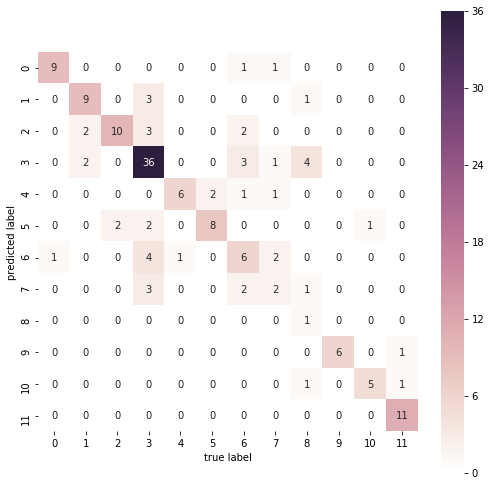

In [23]:
mat_rf_k12 = confusion_matrix(y_test_k12, y_pred_k12)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, sub = plt.subplots(1, 1)
fig.set_size_inches(8.5, 8.5)
sns.heatmap(mat_rf_k12.T, square=True, cmap=cmap, annot=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

попробуем какую-нибудь нейронную сеть

In [54]:
import keras
# f = np.vectorize(lambda x; x-1)
# y_test_k = f(y_test_k)

y_test_k = keras.utils.to_categorical(y_test_k, 21)
y_train_k = keras.utils.to_categorical(y_train_k, 21)

y_test_k12_ = keras.utils.to_categorical(y_test_k12, 12)
y_train_k12_ = keras.utils.to_categorical(y_train_k12, 12)

In [79]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import sklearn
from keras.metrics import categorical_accuracy
model = Sequential()
model.add(Dense(units= 78, activation='relu', input_dim=58))
model.add(Dense(units=64, activation='sigmoid'))
# model.add(Dropout(0.01))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(1024, activation='tanh'))
# model.add(Dropout(0.01))
# model.add(Dense(units=512, activation='relu'))
# model.add(Dense(units=12, activation='softmax'))
model.add(Dense(units=12, activation='sigmoid'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train_k12, y_train_k12_, batch_size=120, epochs=20, verbose=0, validation_data=(X_test_k12, y_test_k12_))
score = model.evaluate(X_test_k12, y_test_k12_, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
print('r-score',sklearn.metrics.r2_score(model.predict_classes(X_test_k12), y_test_k12))

Test score: 2.00382461427
Test accuracy: 0.36075949518
r-score -1.26785015649


разделим на три датасета на пера будем тренировать классификатор, на 2 проверять результат и на 3 проверять результат после подбора модели, чтобы не "подобрать модель"

In [80]:
X_train_knn, X_test_val_knn, y_train_knn, y_test_val_knn = train_test_split(df, label_knn, test_size=0.4, random_state=123456)
X_test_knn, X_val_knn, y_test_knn, y_val_knn = train_test_split(X_test_val_knn, y_test_val_knn, test_size=0.5, random_state=123456)

Сначала попробуем простую линейную регрессию

In [81]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train_knn, y_train_knn)
y_pred_knn = np.round(regr.predict(X_test_knn))

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


R2_score: 0.375097548269
mean_squared_error: 19.3380952381
accuracy: 0.114285714286
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         1
        2.0       0.07      1.00      0.13         1
        3.0       0.00      0.00      0.00         3
        4.0       0.00      0.00      0.00         0
        5.0       0.00      0.00      0.00         6
        6.0       0.00      0.00      0.00        11
        7.0       0.22      0.11      0.14        19
        8.0       0.05      0.08      0.06        13
        9.0       0.75      0.19      0.31        31
       10.0       0.00      0.00      0.00        16
       11.0       1.00      0.19      0.32        16
       12.0       0.33      0.08      0.12        26
       13.0       0.00      0.00      0.00        18
       14.0       0.19      0.19      0.19        21
       15.0       0.00      0.00      0.00         8
       16.0       0.00      0.00      0.00         5
       17.0   

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


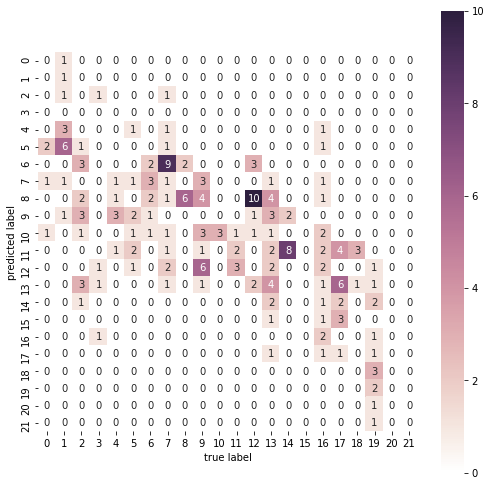

In [83]:
from sklearn import metrics
print("R2_score:", r2_score(y_test_knn,y_pred_knn))
print("mean_squared_error:", mean_squared_error(y_test_knn, y_pred_knn))
accuracy = accuracy_score(y_test_knn, y_pred_knn)
print("accuracy:", accuracy)
print(metrics.classification_report(y_pred_knn, y_test_knn))
mat_knn = confusion_matrix(y_test_knn, y_pred_knn)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, sub = plt.subplots(1, 1)
fig.set_size_inches(8.5, 8.5)
sns.heatmap(mat_knn.T, square=True, cmap=cmap, annot=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

совсем печально, попробуем использовать полиномиальную  регрессию, 

R2_score: 0.375097548269
mean_squared_error: 19.3380952381
accuracy: 0.114285714286
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         1
        2.0       0.07      1.00      0.13         1
        3.0       0.00      0.00      0.00         3
        4.0       0.00      0.00      0.00         0
        5.0       0.00      0.00      0.00         6
        6.0       0.00      0.00      0.00        11
        7.0       0.22      0.11      0.14        19
        8.0       0.05      0.08      0.06        13
        9.0       0.75      0.19      0.31        31
       10.0       0.00      0.00      0.00        16
       11.0       1.00      0.19      0.32        16
       12.0       0.33      0.08      0.12        26
       13.0       0.00      0.00      0.00        18
       14.0       0.19      0.19      0.19        21
       15.0       0.00      0.00      0.00         8
       16.0       0.00      0.00      0.00         5
       17.0   

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


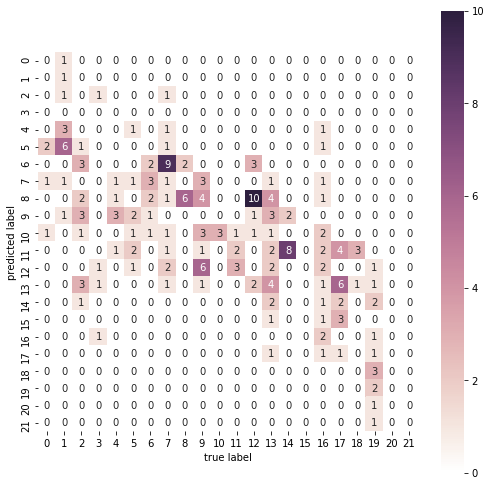

In [84]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# create a Linear Regressor   
lin_regressor = LinearRegression()

# pass the order of your polynomial here  
poly = PolynomialFeatures(2)

# convert to be used further to linear regression
X_transform_knn = poly.fit_transform(X_train_knn)
X_test_knn_tr = poly.fit_transform(X_test_knn)
# fit this to Linear Regressor
print("R2_score:", r2_score(y_test_knn,y_pred_knn))
print("mean_squared_error:", mean_squared_error(y_test_knn, y_pred_knn))
accuracy = accuracy_score(y_test_knn, y_pred_knn)
print("accuracy:", accuracy)
print(metrics.classification_report(y_pred_knn, y_test_knn))
mat_knn = confusion_matrix(y_test_knn, y_pred_knn)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, sub = plt.subplots(1, 1)
fig.set_size_inches(8.5, 8.5)
sns.heatmap(mat_knn.T, square=True, cmap=cmap, annot=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

увеличение признаков не очень разумная идея

Предсказывает не очень, но можно с помощью Lasso вытащить "важные" признаки

In [85]:
lassocv = linear_model.LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train_knn, y_train_knn)
lasso = linear_model.Lasso(max_iter=10000, normalize=True)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train_knn, y_train_knn)
print(pd.Series(lasso.coef_, index=X_train_knn.columns))

index =  np.argsort(np.abs(lasso.coef_[np.abs(lasso.coef_) != 0]))[::-1]
X_train_knn.columns[index]

bio1                  0.000000
bio2                 -0.106393
bio3                  0.530100
bio4                  0.001189
bio5                 -0.000000
bio6                 -0.029276
bio7                  0.000000
bio8                 -0.033806
bio9                  0.005075
bio10                 0.000000
bio11                -0.000000
bio12                 0.000000
bio13                 0.015713
bio14                 0.000000
bio15                -0.063824
bio16                 0.001476
bio17                 0.000000
bio18                -0.032114
bio19                -0.007152
solar_min            -0.000965
solar_max             0.000289
solar_mean            0.000487
wind_min             -3.260823
wind_max              2.751699
wind_mean            -0.365830
vapr_min              0.000000
vapr_max              5.182533
vapr_mean             0.000000
T_GRAVEL             -0.158395
T_SAND                0.000000
T_SILT               -0.432052
T_CLAY                0.000000
T_REF_BU

Index(['T_BS', 'bio18', 'vapr_max', 'bio15', 'bio16', 'T_OC',
       'T_REF_BULK_DENSITY', 'T_GRAVEL', 'T_SILT', 'bio2', 'solar_min',
       'bio17', 'bio19', 'bio1', 'T_TEB', 'T_CLAY', 'wind_mean', 'vapr_mean',
       'vapr_min', 'bio8', 'T_SAND', 'T_CEC_CLAY', 'solar_max', 'wind_min',
       'bio5', 'bio10', 'bio4', 'wind_max', 'T_CEC_SOIL', 'bio7', 'solar_mean',
       'T_PH_H2O', 'bio11', 'bio6', 'bio9', 'bio3', 'bio12', 'bio14', 'bio13'],
      dtype='object')

попробуем тоже самое для датасета  k_means

In [31]:
lassocv = linear_model.LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train_k12, y_train_k12)
lasso = linear_model.Lasso(max_iter=10000, normalize=True)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train_k12, y_train_k12)
pred_lasso = np.round(lasso.predict(X_test_k12))
# print(pd.Series(lasso.coef_, index=X_train_knn.columns))
print("R2_score:", r2_score(y_test_k12,pred_lasso))
accuracy = accuracy_score(y_test_k12, pred_lasso)
print("accuracy:", accuracy)
print("feature with not null coeff")
index =  np.argsort(np.abs(lasso.coef_[np.abs(lasso.coef_) != 0]))[::-1]
X_train_knn.columns[index]

R2_score: 0.215386708496
accuracy: 0.183544303797
feature with not null coeff


Index(['bio15', 'bio10', 'bio12', 'bio9', 'solar_mean', 'bio17', 'bio14',
       'bio4', 'bio5', 'solar_max', 'bio19', 'solar_min', 'bio16', 'bio11',
       'bio6', 'bio13', 'bio18', 'bio2', 'bio3', 'bio1', 'bio8', 'bio7'],
      dtype='object')

Попробуем NaiveBaise

R2_score: 0.509379601767
accuracy: 0.645569620253
             precision    recall  f1-score   support

          0       0.80      0.89      0.84         9
          1       0.62      0.62      0.62        13
          2       0.83      0.53      0.65        19
          3       0.69      0.88      0.77        40
          4       0.57      0.67      0.62         6
          5       0.80      0.42      0.55        19
          6       0.33      0.24      0.28        21
          7       0.43      0.33      0.38         9
          8       0.12      0.50      0.20         2
          9       1.00      1.00      1.00         6
         10       0.83      1.00      0.91         5
         11       0.69      1.00      0.82         9

avg / total       0.66      0.65      0.63       158



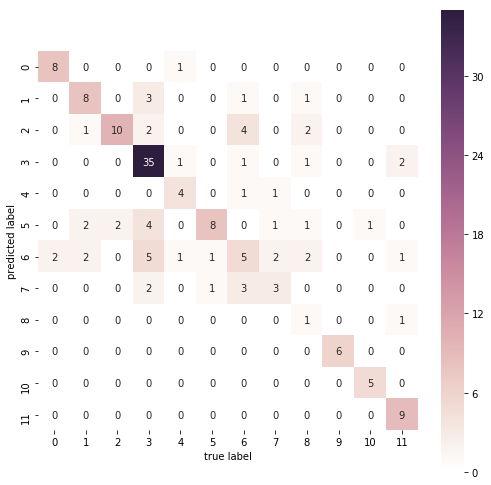

In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_nb = gnb.fit(X_train_k12, y_train_k12).predict(X_test_k12)
print("R2_score:", r2_score(y_test_k12,y_pred_nb))
accuracy = accuracy_score(y_test_k12, y_pred_nb)
print("accuracy:", accuracy)
print(metrics.classification_report(y_pred_nb, y_test_k12))
mat_knn = confusion_matrix(y_test_k12, y_pred_nb)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, sub = plt.subplots(1, 1)
fig.set_size_inches(8.5, 8.5)
sns.heatmap(mat_knn.T, square=True, cmap=cmap, annot=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

In [ ]:
from sklearn.svm import SVC
clf = SVC( kernel = 'poly', degree=3)
clf.fit(X_train_k12, y_train_k12)
pred_svm = clf.predict(X_test_k12)
print("R2_score:", r2_score(y_test_k12,pred_svm))
accuracy = accuracy_score(y_test_k12, pred_svm)
print("accuracy:", accuracy)

In [1]:
print(1)

1
